In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
dafnyVMC_file = "../results/placeholder_dataset/dafnyVMC.csv"
libraries_file = "../results/placeholder_dataset/libraries.csv"
cedar_file = "../results/placeholder_dataset/cedar.csv"

In [12]:
df_dafnyVMC = pd.read_csv(dafnyVMC_file)
df_libraries = pd.read_csv(libraries_file)
df_cedar = pd.read_csv(cedar_file)

In [5]:
df_dafnyVMC.head()

,Index,Original File,Original Method,Original Method Time,Original Method Result,Original Method File,Assertion,Time Difference,New Method File,New Method,New Method Time,New Method Result,New Result File
0,1,/usr/local/home/eric/dafny_repos/Dafny-VMC/src...,DivModAddDenominator,3.706939,Correct,./results/DivModAddDenominator_0.txt,assert 0 == m * zp + ((n + m) % m) - (n % m);\n,NaN,.//results/DivModAddDenominator_fix_1.dfy,DivModAddDenominator,7.607721,OutOfResource,./results/DivModAddDenominator_1.txt
1,4,/usr/local/home/eric/dafny_repos/Dafny-VMC/src...,FloorIsCorrect,7.155055,Errors,./results/FloorIsCorrect_0.txt,assert Floor(r) as real <= ToReal(r);\n,NaN,.//results/FloorIsCorrect_fix_4.dfy,FloorIsCorrect,7.867614,Errors,./results/FloorIsCorrect_4.txt
2,5,/usr/local/home/eric/dafny_repos/Dafny-VMC/src...,FloorIsCorrect,7.155055,Errors,./results/FloorIsCorrect_0.txt,assert r.numer < nextMultiple;\n,NaN,.//results/FloorIsCorrect_fix_5.dfy,FloorIsCorrect,8.013088,Errors,./results/FloorIsCorrect_5.txt
3,6,/usr/local/home/eric/dafny_repos/Dafny-VMC/src...,PosCountAddImpliesAdd,7.751982,Correct,./results/PosCountAddImpliesAdd_0.txt,assert CountableUnion(f) == e1 + e2;\n,NaN,.//results/PosCountAddImpliesAdd_fix_6.dfy,PosCountAddImpliesAdd,8.998984,Errors,./results/PosCountAddImpliesAdd_6.txt
4,11,/usr/local/home/eric/dafny_repos/Dafny-VMC/src...,LimitIsMultiplicative,3.583202,Correct,./results/LimitIsMultiplicative_0.txt,"assert ExistsCloseSuffix(sequence1, limit1, ep...",NaN,.//results/LimitIsMultiplicative_fix_11.dfy,LimitIsMultiplicative,6.898129,Errors,./results/LimitIsMultiplicative_11.txt


In [14]:
assertions_per_method_VMC = df_dafnyVMC.groupby("Original Method")["Assertion"].count()
assertions_per_method_libraries = df_libraries.groupby("Original Method")[
    "Assertion"
].count()
assertions_per_method_cedar = df_cedar.groupby("Original Method")["Assertion"].count()

In [19]:
assertions_per_method_cedar

Original Method
AndLRetSafe                  2
AndLShortSafe                1
AndRShortSafe                1
AndSafe                      1
AndTrueStrong                1
CountDC1SepMeansNoDc         1
CountDCComp                  1
CountDCLast                  1
EqEntityDiffSafe             1
LubIsUB                      1
LubUndefUbUndef              1
OrLShortSafe                 1
OrRRetSafe                   3
OrRShortSafe                 3
OrSafe                       2
OrTrueStrong                 1
ParseDigitsAndDot            1
RecordSemanticsOkAttrs       1
SeqAddInequality             1
SoundArith                   3
SoundContains                1
SoundEqAuxDiffUids           1
SoundHasAttr                 1
SoundIf                      1
SoundInSetMemberFalse        4
SoundIneq                    2
SoundLike                    1
SoundMulBy                   2
SoundNot                     1
SoundOr                      1
StrictGetAttr                1
StrictGetLubRecordType 

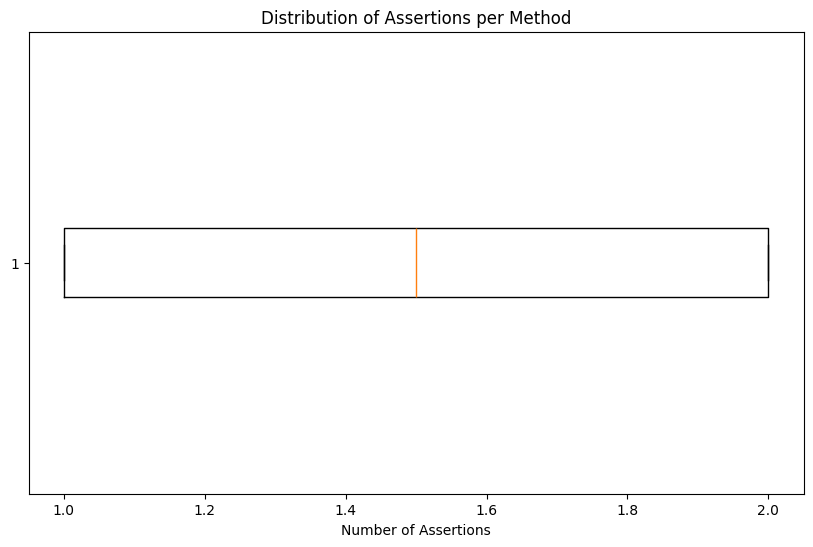

In [15]:
plt.figure(figsize=(10, 6))
plt.boxplot(assertions_per_method_VMC.values, vert=False)
plt.xlabel("Number of Assertions")
plt.title("Distribution of Assertions per Method")
plt.show()

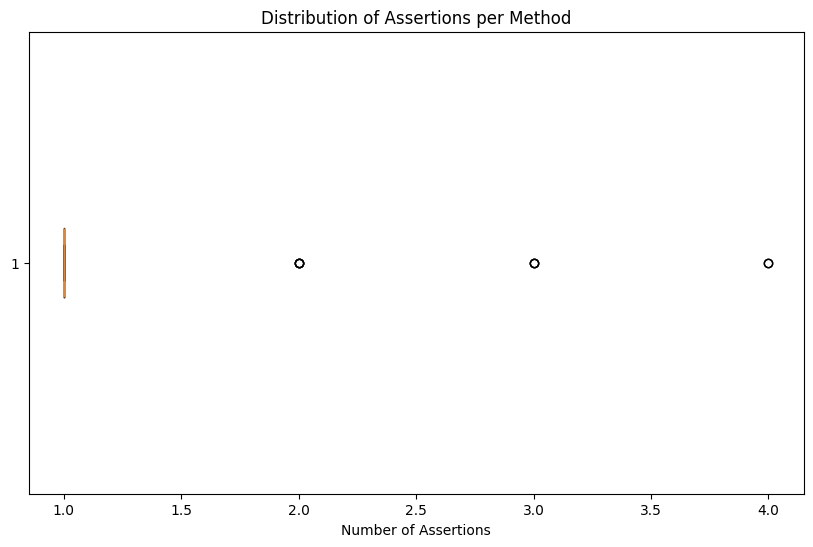

In [16]:
plt.figure(figsize=(10, 6))
plt.boxplot(assertions_per_method_cedar.values, vert=False)
plt.xlabel("Number of Assertions")
plt.title("Distribution of Assertions per Method")
plt.show()

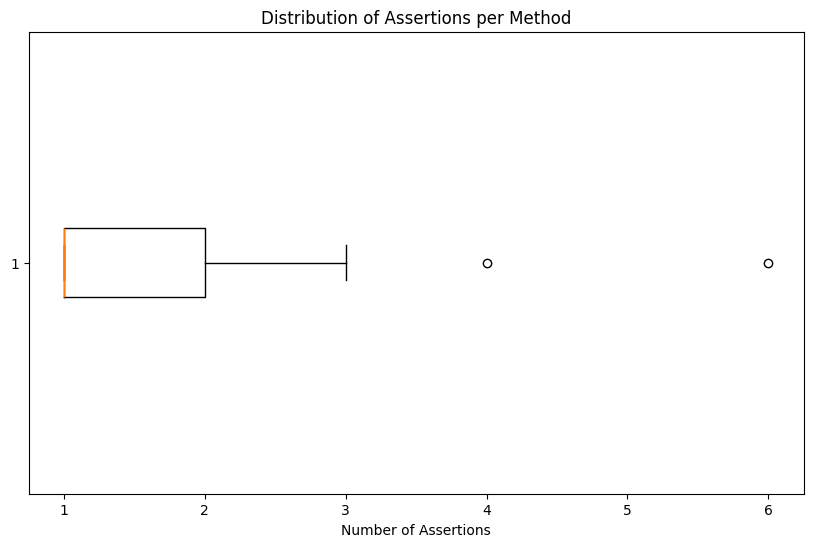

In [17]:
plt.figure(figsize=(10, 6))
plt.boxplot(assertions_per_method_libraries.values, vert=False)
plt.xlabel("Number of Assertions")
plt.title("Distribution of Assertions per Method")
plt.show()

In [22]:
# aggregate the results
all_assertions = pd.concat(
    [
        assertions_per_method_VMC,
        assertions_per_method_libraries,
        assertions_per_method_cedar,
    ]
)
all_assertions

Original Method
BoundOfConvergentSequence    1
ConstantSequenceConverges    1
DivModAddDenominator         1
EnsureUntilTerminates        1
FloorIsCorrect               2
                            ..
StrictLubIsStrict            1
StrictSubtyIsStrict          1
StrictTypeLub                1
SubtyCompatMatchPointwise    1
TypesafeCallSemantics        1
Name: Assertion, Length: 93, dtype: int64

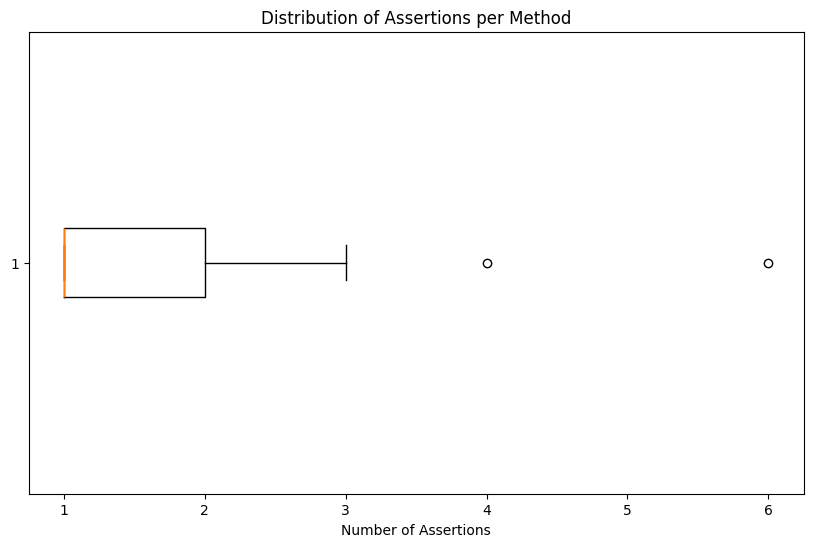

In [23]:
plt.figure(figsize=(10, 6))
plt.boxplot(assertions_per_method_libraries.values, vert=False)
plt.xlabel("Number of Assertions")
plt.title("Distribution of Assertions per Method")
plt.show()